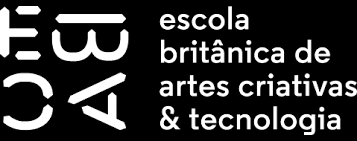

___

<center><h1>Exercício 01 - Módulo 24</h1></center>
<center><h1>AdaBoost</h1></center>



## **Curso**: Cientista de Dados 
## **Aluno**: Victor Resende

___

### Técnicas de Ensemble

Significa um algoritmo que utiliza vários modelos em conjunto com o objetivo de obter um modelo final com melhores resultados.

**AdaBoost:**

**AdaBoost**: é um dos métodos mais populares de **Boosting**, e consiste na combinação de diversos modelos de aprendizagem fracos para criar um modelo de aprendizagem forte. Inventado por Yoav Freund e Robert Schapire, é um algoritmo de aprendizagem de máquina que aumenta a performance de outros algoritmos de aprendizagem.

#### 1. Diferenças entre Random Forest e AdaBoost:


- Estratégia de combinação de modelos:

**Random Forest**: constrói várias árvores de decisão independentes (sem depender das anteriores), e o resultado final é uma média ou votação majoritária. <br> **AdaBoost**: adiciona classificadores iterativamente, onde cada novo classificador dá mais ênfase aos erros cometidos pelos anteriores.

- Método de Treinamento:

**Random Forest**: cada árvore é treinada de forma independente usando uma amostra aleatória dos dados (bagging). <br> **AdaBoost**: classificadores são treinados sequencialmente, com pesos ajustados a cada iteração para focar nas amostras mal classificadas.

- Peso das Árvores/Modelos:

**Random Forest**: todas as árvores têm o mesmo peso na votação final. <br>
**AdaBoost**: modelos mais precisos recebem pesos maiores na combinação final.

- Sensibilidade a Ruído:

**Random Forest**: mais robusto ao ruído, pois combina vários modelos independentes. <br>
**AdaBoost**: pode ser mais sensível ao ruído, já que tenta focar em amostras difíceis ou mal classificadas.

- Overfitting:

**Random Forest**: menos propenso ao overfitting devido à aleatoriedade envolvida na construção de árvores. <br>
**AdaBoost**: pode superestimar amostras ruidosas ou outliers, aumentando o risco de overfitting, principalmente se forem usados muitos estimadores.


______

#### 2. Exemplificando com o código:

Código com AdaBoost usando o dataset load_iris.

In [23]:
# Importando bibliotecas necessárias:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Carregando o dataset Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando o modelo AdaBoost com árvore de decisão como estimador base
base_estimator = DecisionTreeClassifier(max_depth=1)
ada = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)

# Treinando o modelo
ada.fit(X_train, y_train)

# Fazendo previsões
y_pred = ada.predict(X_test)

# Avaliando o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Acurácia: 1.0
Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



______

#### 3. Hyperparâmetros importantes no AdaBoost:

- **n_estimators**: número de classificadores fracos a serem treinados. Um valor maior pode melhorar a performance, mas pode levar ao overfitting.
- **learning_rate**: determina o quanto a contribuição de cada classificador fraco influencia o modelo final. Valores menores aumentam a robustez, mas podem exigir mais estimadores.
- **base_estimator**: o classificador fraco que será usado (por padrão, é um **DecisionTreeClassifier com profundidade 1**, conhecido como **"stump"**).
- **algorithm**: especifica o tipo de algoritmo a ser usado. Pode ser “SAMME” ou “SAMME.R” (este último usa probabilidades reais e é o padrão).
- **random_state**: controla a aleatoriedade do treinamento, o que pode ajudar a garantir reprodutibilidade dos resultados.

______

#### 4. GridSearch para Encontrar os Melhores Hyperparâmetros:

GridSearchCV para encontrar os melhores parâmetros para o AdaBoost usando o dataset load_iris.

In [35]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Criando o AdaBoost com base no DecisionTree
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Usando o GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Exibindo os melhores hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Avaliando o modelo com os melhores hiperparâmetros
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)
print("Acurácia com os melhores hiperparâmetros:", accuracy_score(y_test, y_pred))


Melhores hiperparâmetros: {'base_estimator__max_depth': 2, 'learning_rate': 0.01, 'n_estimators': 50}
Acurácia com os melhores hiperparâmetros: 1.0


C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Visualização dos dados:

Comparando o desempenho dos modelos AdaBoost ajustados antes e após a otimização dos hiperparâmetros utilizando gráficos e tabelas:

- **Tabela Comparativa de Acurácia**: mostra a acurácia do modelo AdaBoost antes e após o ajuste dos hiperparâmetros.
- **Gráfico de Barras**: compara, visualmente, as acurácias dos dois modelos (antes e depois).
- **Matriz de Confusão**: exibe as matrizes de confusão para analisar a qualidade das previsões dos modelos.
- **Gráfico de Importância de Características**: se aplicável, podemos visualizar a importância de cada característica no modelo final.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Acurácia (Default): 1.0
Relatório de Classificação (Default):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Acurácia (GridSearch): 1.0
Relatório de Classificação (GridSearch):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Tabela Comparativa de Acurácias:
                  Modelo  Acurácia
0       AdaBoost Default       1.0
1  AdaBoost (GridSearch)       1.0


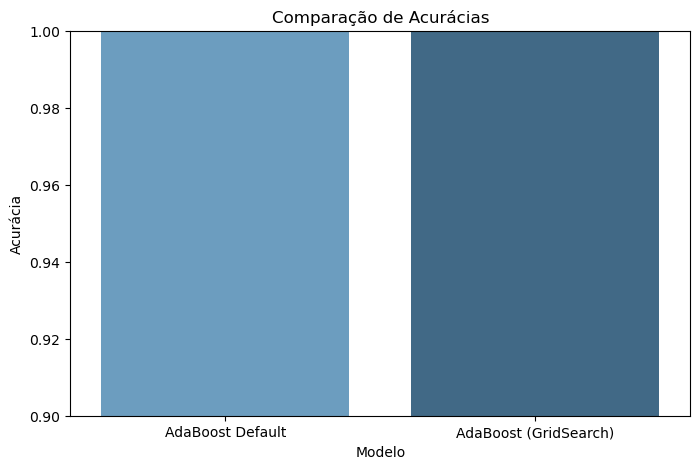

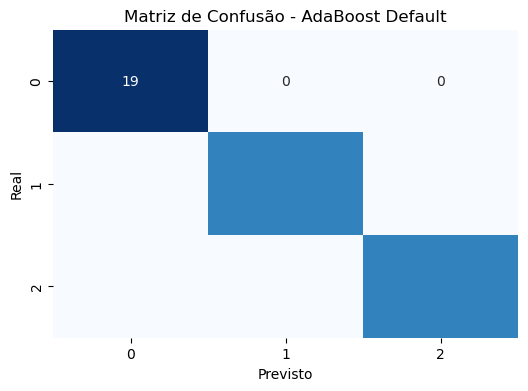

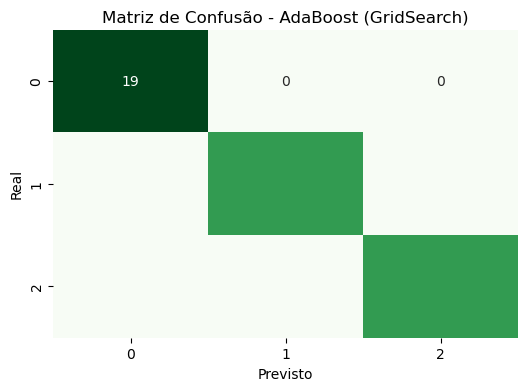

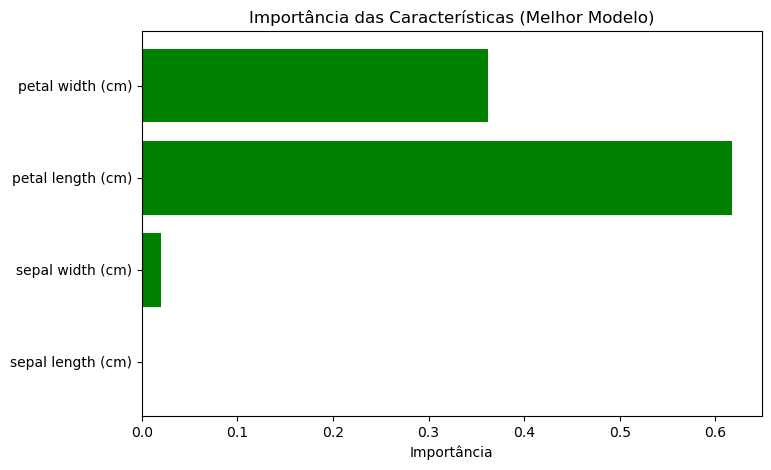

In [37]:
# Importando as bibliotecas necessárias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregando o dataset Iris:
iris = load_iris()
X, y = iris.data, iris.target

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# =========================
# Modelo 1: AdaBoost Default:
# =========================
# Definindo AdaBoost com parâmetros padrão
base_estimator_default = DecisionTreeClassifier(max_depth=1)
ada_default = AdaBoostClassifier(base_estimator=base_estimator_default, n_estimators=50, random_state=42)

# Treinando o modelo:
ada_default.fit(X_train, y_train)

# Fazendo previsões:
y_pred_default = ada_default.predict(X_test)

# Avaliando o modelo:
acc_default = accuracy_score(y_test, y_pred_default)
print(f"Acurácia (Default): {acc_default}")
print("Relatório de Classificação (Default):\n", classification_report(y_test, y_pred_default))

# Matriz de confusão (Default):
conf_matrix_default = confusion_matrix(y_test, y_pred_default)


# ====================================
# Modelo 2: AdaBoost com GridSearchCV:
# ====================================
# Definindo os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}

# Criando o AdaBoost com base no DecisionTree:
base_estimator = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Usando o GridSearchCV para encontrar os melhores hiperparâmetros:
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Melhor modelo:
best_ada = grid_search.best_estimator_

# Fazendo previsões com o melhor modelo:
y_pred_best = best_ada.predict(X_test)

# Avaliando o modelo com os melhores hiperparâmetros:
acc_best = accuracy_score(y_test, y_pred_best)
print(f"Acurácia (GridSearch): {acc_best}")
print("Relatório de Classificação (GridSearch):\n", classification_report(y_test, y_pred_best))

# Matriz de confusão (GridSearch):
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# ============================
# Comparação e Visualização
# ============================

# Tabela comparativa de acurácias:
df_comparacao = pd.DataFrame({
    'Modelo': ['AdaBoost Default', 'AdaBoost (GridSearch)'],
    'Acurácia': [acc_default, acc_best]
})

# Exibindo a tabela de comparação:
print("\nTabela Comparativa de Acurácias:")
print(df_comparacao)

# Gráfico de barras comparando acurácias:
plt.figure(figsize=(8, 5))
sns.barplot(x='Modelo', y='Acurácia', data=df_comparacao, palette='Blues_d')
plt.title('Comparação de Acurácias')
plt.ylabel('Acurácia')
plt.ylim(0.9, 1)
plt.show()

# Gráfico de Matriz de Confusão - Default:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_default, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - AdaBoost Default')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Gráfico de Matriz de Confusão - GridSearch:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão - AdaBoost (GridSearch)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# Comparação de Importância das Features:
importances = best_ada.feature_importances_
features = iris.feature_names

# Plotando a importância das características:
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='green')
plt.title('Importância das Características (Melhor Modelo)')
plt.xlabel('Importância')
plt.show()


### Verificando Overfitting:


Comparação de Acurácia entre Treino e Teste:
                  Modelo  Acurácia Treino  Acurácia Teste
0       AdaBoost Default         0.942857             1.0
1  AdaBoost (GridSearch)         0.961905             1.0


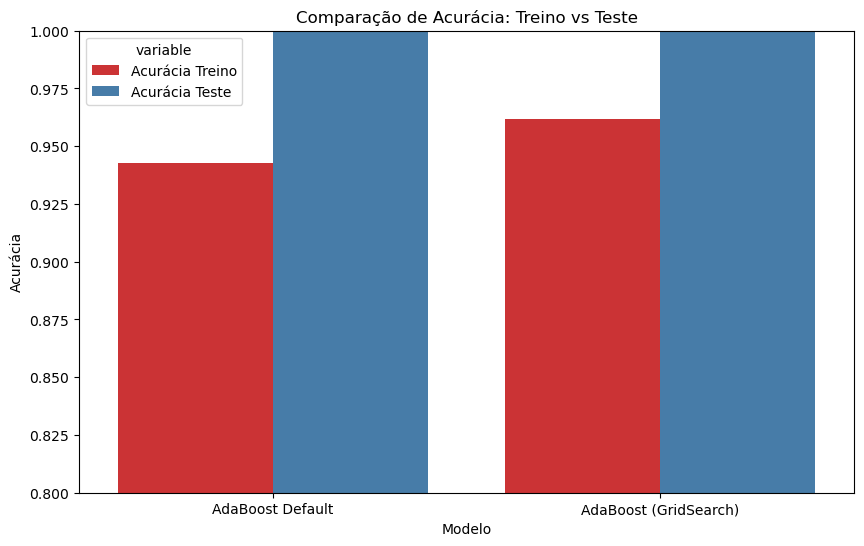

C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-package

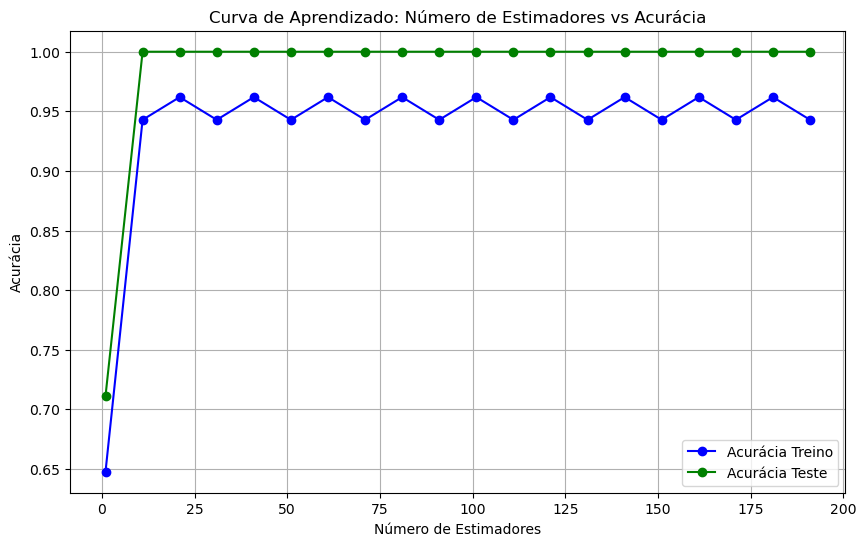

In [42]:
# Comparando desempenho no conjunto de treino e teste:

# Acurácia no conjunto de treino e teste para o modelo Default
train_acc_default = accuracy_score(y_train, ada_default.predict(X_train))
test_acc_default = accuracy_score(y_test, y_pred_default)

# Acurácia no conjunto de treino e teste para o melhor modelo (GridSearch)
train_acc_best = accuracy_score(y_train, best_ada.predict(X_train))
test_acc_best = accuracy_score(y_test, y_pred_best)

# Exibindo a comparação de acurácia entre treino e teste:
df_overfit_check = pd.DataFrame({
    'Modelo': ['AdaBoost Default', 'AdaBoost (GridSearch)'],
    'Acurácia Treino': [train_acc_default, train_acc_best],
    'Acurácia Teste': [test_acc_default, test_acc_best]
})

# Exibindo a tabela de comparação:
print("\nComparação de Acurácia entre Treino e Teste:")
print(df_overfit_check)

# Gráfico de barras comparando acurácias de treino e teste
df_melted = df_overfit_check.melt(id_vars='Modelo', value_vars=['Acurácia Treino', 'Acurácia Teste'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='value', hue='variable', data=df_melted, palette='Set1')
plt.title('Comparação de Acurácia: Treino vs Teste')
plt.ylabel('Acurácia')
plt.ylim(0.8, 1)
plt.show()

# =====================
# Curva de Aprendizado:
# =====================
train_accuracies = []
test_accuracies = []

n_estimators_range = range(1, 201, 10)

# Avaliando o desempenho com diferentes números de estimadores:
for n in n_estimators_range:
    ada_temp = AdaBoostClassifier(base_estimator=base_estimator_default, n_estimators=n, random_state=42)
    ada_temp.fit(X_train, y_train)
    
    # Acurácia no conjunto de treino
    train_accuracies.append(accuracy_score(y_train, ada_temp.predict(X_train)))
    
    # Acurácia no conjunto de teste
    test_accuracies.append(accuracy_score(y_test, ada_temp.predict(X_test)))

# Plotando a curva de aprendizado:
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracies, label='Acurácia Treino', marker='o', color='blue')
plt.plot(n_estimators_range, test_accuracies, label='Acurácia Teste', marker='o', color='green')
plt.title('Curva de Aprendizado: Número de Estimadores vs Acurácia')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()


### Análises:

Verificamos, pela proximidade entre treino e teste, que o modelo generaliza bem.

#### Documentação pesquisada:

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- https://pedroazambuja.medium.com/adaboost-adaptive-boosting-dbbec150fced
- https://pt.wikipedia.org/wiki/AdaBoost
- https://scikit-learn.org/stable/modules/ensemble.html

______